<a href="https://colab.research.google.com/github/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/blob/main/028_Zaki_Fauzan__Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/main/dataset_market_basket.csv")

In [63]:
# setting pandas agar bisa menampilkan seluruh kolom yang ada
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
# Lihat Data Tabular item
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,speciality chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# 1 Item set
df.sum()

whole milk              5
pastry                  1
salty snack             1
sausage                 4
semi-finished bread     1
yogurt                  1
soda                    3
pickled vegetables      1
canned beer             1
misc. beverages         1
hygiene articles        1
rolls/buns              3
frankfurter             2
curd                    1
beef                    1
white bread             1
butter                  2
frozen vegetables       1
other vegetables        1
tropical fruit          1
sugar                   1
speciality chocolate    1
frozen meals            1
dental care             1
root vegetables         1
detergent               1
dish cleaner            1
cling film/bags         1
dtype: int64

In [65]:
# Meletakkan item yang ada pada array
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'curd', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'speciality chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [66]:
#2 Item set
from itertools import permutations

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'speciality chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('pastry', 'sausage'),
 ('pastry', 'semi-finished bread'),
 ('pastry', '

In [67]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls/buns', 'sausage'),
 ('frankfurte

In [68]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('canned beer', 'misc. beverages')": 1,
 "(

In [69]:
# Melihat banyak transaksi
len(df)

19

In [70]:
# List support
print("List Support setiap kombinasi")
for item,ab in hitung.items():
  print(f"{item} support = {round((ab/len(df)*100),2)}%")

#Ini untuk hasil nilai support

List Support setiap kombinasi
('whole milk', 'pastry') support = 5.26%
('whole milk', 'salty snack') support = 5.26%
('whole milk', 'sausage') support = 10.53%
('whole milk', 'semi-finished bread') support = 5.26%
('whole milk', 'yogurt') support = 5.26%
('whole milk', 'soda') support = 5.26%
('whole milk', 'rolls/buns') support = 5.26%
('whole milk', 'butter') support = 5.26%
('pastry', 'whole milk') support = 5.26%
('pastry', 'salty snack') support = 5.26%
('salty snack', 'whole milk') support = 5.26%
('salty snack', 'pastry') support = 5.26%
('sausage', 'whole milk') support = 10.53%
('sausage', 'semi-finished bread') support = 5.26%
('sausage', 'yogurt') support = 5.26%
('sausage', 'hygiene articles') support = 5.26%
('sausage', 'rolls/buns') support = 10.53%
('semi-finished bread', 'whole milk') support = 5.26%
('semi-finished bread', 'sausage') support = 5.26%
('semi-finished bread', 'yogurt') support = 5.26%
('yogurt', 'whole milk') support = 5.26%
('yogurt', 'sausage') support 

In [71]:
# List Confidens
print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")
#hasil ini menampilkan confidence setiap pasangan

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->w

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

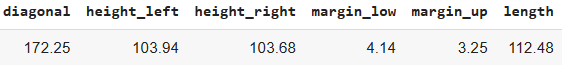
<!-- 1412 -->

In [72]:
df1 = pd.read_csv('https://raw.githubusercontent.com/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/main/deteksi_uang_palsu.csv')

In [73]:
df1

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [74]:
df2 = pd.get_dummies(df1)

In [75]:
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [76]:
TARGET = df1.is_genuine
data = df1.drop(columns=["is_genuine"])

In [77]:
data

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.06,104.24,103.66,4.24,3.10,113.02
1,171.66,103.68,103.41,4.35,3.33,113.74
2,172.23,104.00,103.35,4.43,2.95,113.12
3,172.07,104.21,103.82,4.29,3.35,113.30
4,171.79,104.57,104.04,4.26,3.15,113.46
5,172.00,104.23,104.52,5.76,3.37,110.94
6,171.56,104.03,103.93,5.47,3.50,111.67
7,171.90,104.33,104.40,4.70,3.31,112.12
8,171.84,104.06,104.10,4.87,3.25,111.04
9,172.11,104.14,104.15,4.84,3.28,110.98


In [78]:
from sklearn.neighbors import NearestNeighbors
# hitung jarak antara data baru dan setiap baris pada dataset
distances, indices = NearestNeighbors().fit(data).kneighbors(data)

# simpan hasil jarak dalam array
distances = distances[:, 1:]  # buang jarak ke dirinya sendiri
distances_new = distances[-1, :]  # ambil jarak baris terakhir

# inisialisasi Nearest Neighbors
k = 3  # jumlah tetangga terdekat yang ingin diambil
nn = NearestNeighbors(n_neighbors=k)

data_baru = pd.DataFrame({
    'diagonal': [172.25],
    'height_left': [103.94],
    'height_right': [103.68],
    'margin_low': [4.14],
    'margin_up': [3.25],
    'length': [112.48]
})

## 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [79]:
# hitung jarak
jarak = []
for i in range(len(data)):
    jarak_i = 0
    for j in range(len(data.columns)):
        jarak_i += (data.iloc[i,j] - data_baru.iloc[0,j])**2
    jarak.append(np.sqrt(jarak_i))

# tambahkan kolom jarak baru ke dataset
data['Jarak'] = jarak

In [80]:
data["Jarak"]

0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: Jarak, dtype: float64

In [81]:
data

,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


## 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [82]:
data_sorted = data.sort_values(by=['Jarak'])

In [83]:
data_k_neighbors = data.nsmallest(k, 'Jarak')

In [84]:
data_k_neighbors

,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


## 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
k = 3  # Jumlah tetangga terdekat yang akan diambil
knn = KNeighborsClassifier(n_neighbors=k)

# Pisahkan data dan target pada dataset
X = data.drop(columns=['Jarak'],axis=1)

# Train model KNN dengan dataset
knn.fit(X, TARGET)

# Hitung jarak antara data baru dan data pada setiap baris pada dataset
jarak, indeks = knn.kneighbors(data_baru)

# Tampilkan K jarak terdekat
print("Berdasarkan hasil dari perhitungan no 1 dan 2 maka hasil prediksi yang muncul adalah :",knn.predict(data_baru))


Berdasarkan hasil dari perhitungan no 1 dan 2 maka hasil prediksi yang muncul adalah : [ True]


# (3) Analisis

> Nama : Zaki Fauzan Rabbani

> Nim : 2109116028


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding



Sumber Dataset = https://www.kaggle.com/datasets/alieframdhanywijaya/datasetpinjamannasabahcsv

### Penjelasan Dataset

Data pinjaman nasabah merupakan kumpulan data yang berisi informasi mengenai nasabah yang melakukan peminjaman pada sebuah lembaga keuangan. Informasi yang terdapat dalam dataset ini sangat penting bagi lembaga keuangan untuk mengambil keputusan terkait dengan pemberian pinjaman, seperti menentukan besar pinjaman, jangka waktu, suku bunga, dan risiko kredit yang mungkin terjadi.

Dalam melakukan analisis data pinjaman nasabah, lembaga keuangan dapat mengevaluasi risiko kredit dari calon peminjam dengan menganalisis data seperti pendapatan, pekerjaan, jumlah tanggungan keluarga, dan sebagainya. Dengan melakukan analisis ini, lembaga keuangan dapat menentukan apakah calon peminjam layak untuk diberikan pinjaman atau tidak.

Selain itu, analisis data pinjaman nasabah juga dapat membantu lembaga keuangan dalam mengembangkan strategi bisnis, seperti menentukan target pasar yang tepat, menyesuaikan produk yang ditawarkan dengan kebutuhan nasabah, meningkatkan efisiensi proses pemberian kredit, dan sebagainya.

### Tujuan Analisis Dataset

Tujuan dari menganalisis dataset ini untuk mencari kategori yang bagaimana yang dapat diberikan pinjaman. Dari dataset diatas, dilakukan pengolahan data untuk memprediksi kategori yang dapat melakukan pinjaman, apakah nantinya kategori yang incomenya kecil dengan jumlah tanggungan besar atau lainnya.

## Data Understanding

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/main/dataset-pinjaman-nasabah.csv')

In [87]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


### Penjelasan setiap kolom

ID Nasabah = Merupakan ID pengenal dan pembeda dari setiap nasabah yang pernah melakukan pinjaman. 

Jenis Kelamin = Merupakan kolom yang membedakan jenis kelamin setiap nasabah.

Status Pernikahan = Merupakan Kolom yang berisi status apakah menikah atau tidak.

JumTanggungan = Merupakan kolom yang berisi jumlah tanggungan yang dimiliki setiap nasabah.

Pendidikan = Merupakan kolom yang berisi tentang status pendidikan mereka apakah lulusan kuliah atau tidak.

Wiraswasta = Merupakan kolom yang berisi tentang status nasabah apakah seorang wiraswasta atau tidak.

IncomeNasabah = Merupakan kolom yang berisi pemasukan atau income setiap nasabah.

JumlahPinjaman = Kolom yang menampilkan besar pinjaman yang dimiliki.

JangkaWaktuPinjaman = Merupakan jangka waktu pinjaman tersebut diberikan.
-
Credit_History = Merupakan kolom yang menampilkan riwayat kredit yang dilakukan oleh nasabah.

WilayahTempatTinggal = Merupakan kolom dari data alamat yang ditampung dari nasabah

StatusPinjaman = Merupakan kolom yang menampilkan apakah nasabah masih dalam pinjaman atau tidak.

### Deskripsi Data



In [88]:
import statistics
print("\nKolom            : JumTanggungan")
print("Mean             : ",df["JumTanggungan"].mean())
print("Min              : ", df["JumTanggungan"].min())
print("Max              : ", df["JumTanggungan"].max())
print("Standar Deviasi  : ",statistics.stdev(df["JumTanggungan"]))

print("\nKolom            : IncomeNasabah")
print("Mean             : ",df["IncomeNasabah"].mean())
print("Min              : ", df["IncomeNasabah"].min())
print("Max              : ", df["IncomeNasabah"].max())
print("Standar Deviasi  : ",statistics.stdev(df["IncomeNasabah"]))

print("\nKolom            : IncomePasangan")
print("Mean             : ",df["IncomePasangan"].mean())
print("Min              : ", df["IncomePasangan"].min())
print("Max              : ", df["IncomePasangan"].max())
print("Standar Deviasi  : ",statistics.stdev(df["IncomePasangan"]))

print("\nKolom            : JumlahPinjaman")
print("Mean             : ",df["JumlahPinjaman"].mean())
print("Min              : ", df["JumlahPinjaman"].min())
print("Max              : ", df["JumlahPinjaman"].max())
print("Standar Deviasi  : ",statistics.stdev(df["JumlahPinjaman"]))

print("\nKolom            : JangkaWaktuPinjaman")
print("Mean             : ",df["JangkaWaktuPinjaman"].mean())
print("Min              : ", df["JangkaWaktuPinjaman"].min())
print("Max              : ", df["JangkaWaktuPinjaman"].max())
print("Standar Deviasi  : ",statistics.stdev(df["JangkaWaktuPinjaman"]))


Kolom            : JumTanggungan
Mean             :  0.7629382303839732
Min              :  0.0
Max              :  3.0
Standar Deviasi  :  nan

Kolom            : IncomeNasabah
Mean             :  5403.459283387622
Min              :  150
Max              :  81000
Standar Deviasi  :  6109.041673387178

Kolom            : IncomePasangan
Mean             :  1621.2459283387623
Min              :  0
Max              :  41667
Standar Deviasi  :  2926.2484057650972

Kolom            : JumlahPinjaman
Mean             :  146.41216216216216
Min              :  9.0
Max              :  700.0
Standar Deviasi  :  nan

Kolom            : JangkaWaktuPinjaman
Mean             :  342.0
Min              :  12.0
Max              :  480.0
Standar Deviasi  :  nan


### Visualisasi Data

In [89]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [90]:
import seaborn as sns

<Axes: xlabel='Pendidikan', ylabel='count'>

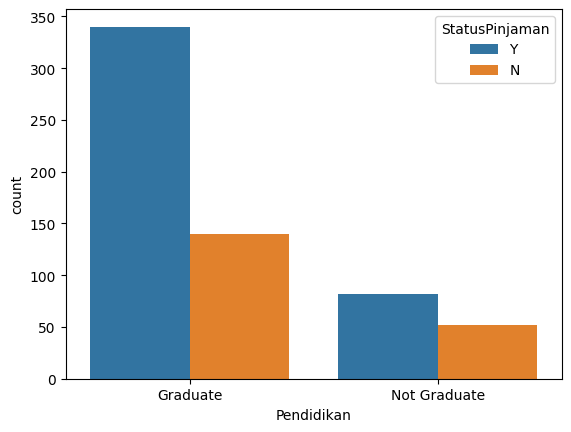

In [91]:
sns.countplot(data=df,x="Pendidikan",hue="StatusPinjaman")

Dari visualisasi diatas menunjukkan bahwa sebagian besar nasabah peminjam adalah mereka yang memiliki status graduate dengan perbandingan yang cukup jauh dan dapat dilihat pada visualisasi diatas

<Axes: xlabel='IncomeNasabah', ylabel='Count'>

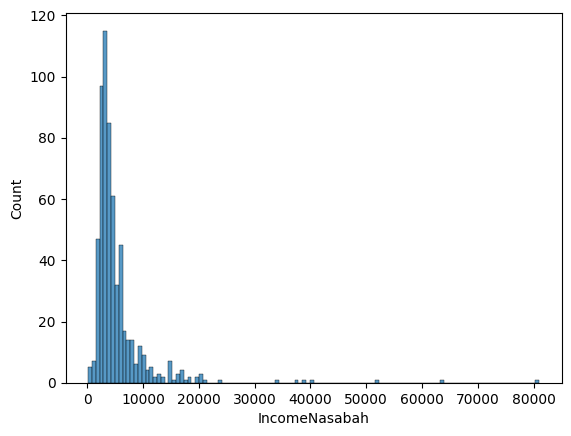

In [92]:
sns.histplot(x='IncomeNasabah', data=df)

Visualisasi data diatas menunjukkan data income nasabah yang menjadi peminjam pada dataset ini memiliki berbagai macam income, namun sebagian besar income nasabah berada pada range 0-10000.

<Axes: xlabel='JumlahPinjaman', ylabel='JenisKelamin'>

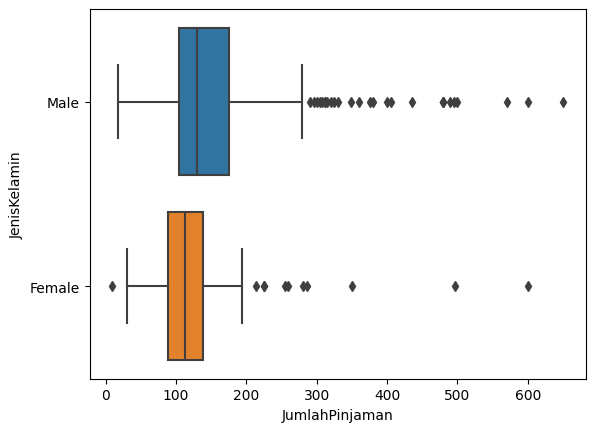

In [93]:
sns.boxplot(x='JumlahPinjaman', y='JenisKelamin', data=df)

Pada visualisasi diatas menunjukkan nasabah dengan jenis kelamin laki-laki jauh lebih banyak dalam melakukan peminjaman dibanding perempuan. Selain itu jumlah peminjaman yang dipinjam juga lebih besar dibanding perempuan.

## Data Preparation

### Menampilkan Jumlah Data dalam Kolom dengan Data Kosong

In [94]:
df.isna().sum()

ID_Nasabah               0
JenisKelamin            13
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64

### Mengubah data kosong dengan modus atau mean

In [95]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean()) 
df["StatusPernikahan"] = df["StatusPernikahan"].fillna(df["StatusPernikahan"].mode()[0])
df["JenisKelamin"] = df["JenisKelamin"].fillna(df["JenisKelamin"].mode()[0])
df["JumTanggungan"] = df["JumTanggungan"].fillna(df["JumTanggungan"].mean())
df["Wiraswasta"] = df["Wiraswasta"].fillna(df["Wiraswasta"].mode()[0])
df["JumlahPinjaman"] = df["JumlahPinjaman"].fillna(df["JumlahPinjaman"].mean())
df["JangkaWaktuPinjaman"] = df["JangkaWaktuPinjaman"].fillna(df["JangkaWaktuPinjaman"].mean())

In [96]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.000000,360.0,1.0,Urban,Y


Mengecek apakah masih ada data kosong

In [97]:
df.isna().sum()

ID_Nasabah              0
JenisKelamin            0
StatusPernikahan        0
JumTanggungan           0
Pendidikan              0
Wiraswasta              0
IncomeNasabah           0
IncomePasangan          0
JumlahPinjaman          0
JangkaWaktuPinjaman     0
Credit_History          0
WilayahTempatTinggal    0
StatusPinjaman          0
dtype: int64

### Mengecek tipe data setiap kolom apakah sudah sesuai

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          614 non-null    object 
 2   StatusPernikahan      614 non-null    object 
 3   JumTanggungan         614 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            614 non-null    object 
 6   IncomeNasabah         614 non-null    int64  
 7   IncomePasangan        614 non-null    int64  
 8   JumlahPinjaman        614 non-null    float64
 9   JangkaWaktuPinjaman   614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  WilayahTempatTinggal  614 non-null    object 
 12  StatusPinjaman        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### Slicing Data

Slicing atau pemilihan sebagian data digunakan untuk memperkecil ukuran dataset dan memfokuskan pada data yang relevan atau menarik untuk dianalisis.

In [99]:
slicing_data = df.iloc[0:100, 1:9]

Slicing Data dengan kategori baris 0 hingga 100 dan kolom ke 3 hingga 8

In [100]:
slicing_data

,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman
0,Male,No,0.0,Graduate,No,5849,0,146.412162
1,Male,Yes,1.0,Graduate,No,4583,1508,128.000000
2,Male,Yes,0.0,Graduate,Yes,3000,0,66.000000
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120.000000
4,Male,No,0.0,Graduate,No,6000,0,141.000000
...,...,...,...,...,...,...,...,...
95,Male,No,0.0,Graduate,No,6782,0,146.412162
96,Female,Yes,0.0,Graduate,No,2484,2302,137.000000
97,Male,Yes,0.0,Graduate,No,1977,997,50.000000
98,Male,Yes,0.0,Not Graduate,No,4188,0,115.000000


### Penghapusan kolom yang dinilai tidak diperlukan dan menambah kolom Status Pinjaman

In [101]:
data = slicing_data.drop(columns=["StatusPernikahan"])
data = data.drop(columns=["Wiraswasta"])
data = data.drop(columns=["IncomePasangan"])
data["StatusPinjaman"]=df["StatusPinjaman"]

In [102]:
data

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,StatusPinjaman
0,Male,0.0,Graduate,5849,146.412162,Y
1,Male,1.0,Graduate,4583,128.000000,N
2,Male,0.0,Graduate,3000,66.000000,Y
3,Male,0.0,Not Graduate,2583,120.000000,Y
4,Male,0.0,Graduate,6000,141.000000,Y
...,...,...,...,...,...,...
95,Male,0.0,Graduate,6782,146.412162,N
96,Female,0.0,Graduate,2484,137.000000,Y
97,Male,0.0,Graduate,1977,50.000000,Y
98,Male,0.0,Not Graduate,4188,115.000000,Y


### Melakukan Pengkategorian beberapa kolom untuk menampilkan baris yang memenuhi kategori yang diinginkan

In [103]:
data1 = data[data["IncomeNasabah"]>data["IncomeNasabah"].mean()]
data2 = data[data["JumTanggungan"]>round(data["JumTanggungan"].mean())]
data3 = data[data["JumlahPinjaman"]>data["JumlahPinjaman"].mean()]

In [104]:
data["IncomeNasabah"].mean()

4122.83

In [105]:
data1

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,StatusPinjaman
0,Male,0.0,Graduate,5849,146.412162,Y
1,Male,1.0,Graduate,4583,128.000000,N
4,Male,0.0,Graduate,6000,141.000000,Y
5,Male,2.0,Graduate,5417,267.000000,Y
9,Male,1.0,Graduate,12841,349.000000,N
15,Male,0.0,Graduate,4950,125.000000,Y
18,Male,0.0,Not Graduate,4887,133.000000,N
20,Male,0.0,Not Graduate,7660,104.000000,N
21,Male,1.0,Graduate,5955,315.000000,Y
25,Male,0.0,Graduate,9560,191.000000,Y


In [106]:
round(data["JumTanggungan"].mean())

1

In [107]:
data2

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,StatusPinjaman
5,Male,2.0,Graduate,5417,267.0,Y
7,Male,3.0,Graduate,3036,158.0,N
8,Male,2.0,Graduate,4006,168.0,Y
10,Male,2.0,Graduate,3200,70.0,Y
11,Male,2.0,Graduate,2500,109.0,Y
12,Male,2.0,Graduate,3073,200.0,Y
14,Male,2.0,Graduate,1299,17.0,Y
23,Male,2.0,Not Graduate,3365,112.0,N
27,Male,2.0,Not Graduate,4226,110.0,Y
29,Female,2.0,Graduate,3750,120.0,Y


In [108]:
data["JumlahPinjaman"].mean()

134.8306081081081

In [109]:
data3

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,StatusPinjaman
0,Male,0.0,Graduate,5849,146.412162,Y
4,Male,0.0,Graduate,6000,141.000000,Y
5,Male,2.0,Graduate,5417,267.000000,Y
7,Male,3.0,Graduate,3036,158.000000,N
8,Male,2.0,Graduate,4006,168.000000,Y
9,Male,1.0,Graduate,12841,349.000000,N
12,Male,2.0,Graduate,3073,200.000000,Y
21,Male,1.0,Graduate,5955,315.000000,Y
24,Male,1.0,Graduate,3717,151.000000,N
25,Male,0.0,Graduate,9560,191.000000,Y
